In [1]:
!pip install ta

In [3]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
import matplotlib.ticker as ticker
import ta

In [82]:
df = pd.read_csv('Hyundai_price(계산용).csv',index_col='Date')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-06-01,199800,199800,196300,197500,791585,-0.048193
2023-06-02,198500,199800,198100,199500,418613,-0.019656
2023-06-05,201500,203500,200000,201000,454150,-0.021898
2023-06-07,202500,203000,195400,196400,960900,-0.020449
2023-06-08,195500,197200,194000,196700,928559,-0.016500
...,...,...,...,...,...,...
2024-08-26,255500,258000,247500,249500,469538,-0.021569
2024-08-27,248500,251000,244500,247500,555018,-0.033203
2024-08-28,249500,261000,246000,259000,1170970,0.025743


# Bollenger band

In [84]:
bol_h = ta.volatility.bollinger_hband(df['Close'])
bol_l = ta.volatility.bollinger_lband(df['Close'])

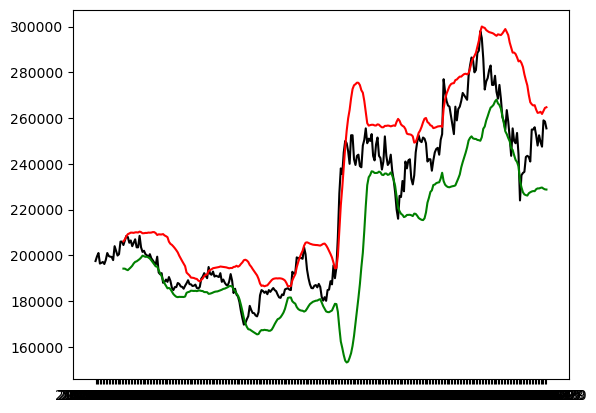

In [86]:
plt.plot(df['Close'],c='k')
plt.plot(bol_h,c='r')
plt.plot(bol_l,c='g')
plt.show()

In [88]:
bol_h.dropna(inplace=True)
bol_l.dropna(inplace=True)

In [90]:
data_bollenger_h = bol_h.loc['2023-09-01':'2024-08-30'] # 볼린저밴드 상단선
data_bollenger_l = bol_l.loc['2023-09-01':'2024-08-30'] # 볼린저밴드 하단선

In [37]:
data_bollenger_h.to_csv('hyundai_bollenger_h.csv')
data_bollenger_l.to_csv('hyundai_bollenger_l.csv')

# RSI

In [92]:
rsi = ta.momentum.rsi(df['Close'])
rsi

Date
2023-06-01          NaN
2023-06-02          NaN
2023-06-05          NaN
2023-06-07          NaN
2023-06-08          NaN
                ...    
2024-08-26    48.186241
2024-08-27    46.668886
2024-08-28    55.371152
2024-08-29    54.951310
2024-08-30    52.384792
Name: rsi, Length: 308, dtype: float64

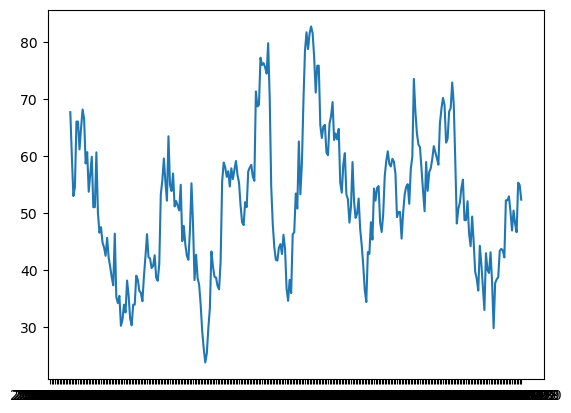

In [94]:
plt.plot(rsi)
plt.show()

In [96]:
rsi.dropna(inplace=True)
rsi

Date
2023-06-21    67.764677
2023-06-22    59.943150
2023-06-23    53.022845
2023-06-26    54.634342
2023-06-27    66.110649
                ...    
2024-08-26    48.186241
2024-08-27    46.668886
2024-08-28    55.371152
2024-08-29    54.951310
2024-08-30    52.384792
Name: rsi, Length: 295, dtype: float64

In [98]:
data_rsi = rsi.loc['2023-09-01':'2024-08-30'] # rsi
data_rsi

Date
2023-09-01    42.279576
2023-09-04    42.046943
2023-09-05    40.372354
2023-09-06    40.735478
2023-09-07    42.617152
                ...    
2024-08-26    48.186241
2024-08-27    46.668886
2024-08-28    55.371152
2024-08-29    54.951310
2024-08-30    52.384792
Name: rsi, Length: 244, dtype: float64

In [48]:
data_rsi.to_csv('data_rsi.csv')

In [ ]:
import pandas as pd

# Step 1: 빈 DataFrame 생성
df = pd.DataFrame(columns=['Date', 'EMA5', 'EMA20', 'MACD', 'Signal'])

# Step 2: 여러 행의 데이터를 추가하는 함수
def add_data(date, ema5, ema20, macd, signal):
    global df
    new_data = pd.DataFrame({'Date': [date], 'EMA5': [ema5], 'EMA20': [ema20], 'MACD' : [macd], 'Signal' : [signal]})
    df = pd.concat([df, new_data], ignore_index=True)

# CSV 파일에서 데이터 읽기
file_path = 'Hyundai_price(계산용).csv'  # 입력 CSV 파일 경로
data = pd.read_csv(file_path)

# EMA 계산 함수 정의
def calculate_ema(data, period):
    ema = data.ewm(span=period, adjust=False).mean()
    return ema

# Close 컬럼에서 EMA(5)와 EMA(20) 계산
ema5 = calculate_ema(data['Close'], 5)
ema20 = calculate_ema(data['Close'], 20)
ema12 = calculate_ema(data['Close'], 12)
ema26 = calculate_ema(data['Close'], 26)

# MACD, signal 계산
macd = ema12 - ema26
signal = calculate_ema(macd, 9)

# 각 날짜에 대해 EMA 값을 추가
for date, e5, e20, macd, signal in zip(data['Date'], ema5, ema20, macd, signal):
    add_data(date, e5, e20, macd, signal)

# Step 3: DataFrame을 CSV 파일로 저장
csv_file_path = 'output_data.csv'  # 출력 CSV 파일 경로
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')

print(ema12)

In [100]:
# df_rsi = pd.read_csv("data_rsi.csv",index_col='Date')
# df_h = pd.read_csv("hyundai_bollenger_h.csv",index_col='Date')
# df_l = pd.read_csv("hyundai_bollenger_l.csv",index_col='Date')
df_tech = pd.read_csv("hyundai_tech.csv",index_col='Date')

In [102]:
# df_rsi = df_rsi.loc['2023-09-01':'2024-08-30']
# df_h = df_h.loc['2023-09-01':'2024-08-30']
# df_l = df_l.loc['2023-09-01':'2024-08-30']
df_tech = df_tech.loc['2023-09-01':'2024-08-30']

In [108]:
total = pd.concat([df_rsi,df_h,df_l,df_tech],axis=1)
total

,rsi,hband,lband,EMA5,EMA20,MACD,Signal
Date,,,,,,,
2023-09-01,42.279576,191186.454503,184103.545497,187540.940168,188924.165647,-2358.304679,-2978.067329
2023-09-04,42.046943,190259.370560,184540.629440,187460.626779,188769.483205,-2212.164401,-2824.886744
2023-09-05,40.372354,190195.728529,184464.271471,187173.751186,188562.865756,-2128.297638,-2685.568923
2023-09-06,40.735478,190079.413520,184410.586480,187015.834124,188385.449970,-2030.358748,-2554.526888
2023-09-07,42.617152,189791.520280,184478.479720,187077.222749,188272.549973,-1890.601968,-2421.741904
...,...,...,...,...,...,...,...
2024-08-26,48.186241,262752.913279,229497.086721,250592.161535,250132.125335,-2187.443956,-4085.956954
2024-08-27,46.668886,261807.521568,229642.478432,249561.441023,249881.446732,-2169.894438,-3702.744450
2024-08-28,55.371152,263187.568883,229162.431117,252707.627349,250749.880377,-1214.037756,-3205.003111


In [110]:
total.to_csv("hyundai_tech_final.csv")

In [114]:
news = pd.read_csv("news_holidel_log_final.csv",index_col='date')
coms = pd.read_csv("comments_holidel_log_final.csv",index_col='date')

In [116]:
news

,score,score(+1),score(log)
date,,,
2023-09-01,-0.707766,0.292234,-0.534270
2023-09-04,-0.563801,0.436199,-0.360316
2023-09-05,-0.399312,0.600688,-0.221351
2023-09-06,-0.647569,0.352431,-0.452925
2023-09-07,-0.633193,0.366807,-0.435563
...,...,...,...
2024-08-26,-0.681308,0.318692,-0.496628
2024-08-27,-0.664403,0.335597,-0.474182
2024-08-28,-0.508486,0.491514,-0.308464


In [118]:
coms

,score,score(+1),score(log)
date,,,
2023-09-01,-0.665716,0.334284,-0.475885
2023-09-04,-0.675033,0.324967,-0.488161
2023-09-05,-0.739726,0.260274,-0.584569
2023-09-06,-0.790261,0.209739,-0.678321
2023-09-07,-0.739406,0.260594,-0.584036
...,...,...,...
2024-08-26,-0.576045,0.423955,-0.372680
2024-08-27,-0.656767,0.343233,-0.464411
2024-08-28,-0.486804,0.513196,-0.289717


In [120]:
result = pd.concat([news,coms,total],axis=1)
result

,score,score(+1),score(log),score,score(+1),score(log),rsi,hband,lband,EMA5,EMA20,MACD,Signal
2023-09-01,-0.707766,0.292234,-0.534270,-0.665716,0.334284,-0.475885,42.279576,191186.454503,184103.545497,187540.940168,188924.165647,-2358.304679,-2978.067329
2023-09-04,-0.563801,0.436199,-0.360316,-0.675033,0.324967,-0.488161,42.046943,190259.370560,184540.629440,187460.626779,188769.483205,-2212.164401,-2824.886744
2023-09-05,-0.399312,0.600688,-0.221351,-0.739726,0.260274,-0.584569,40.372354,190195.728529,184464.271471,187173.751186,188562.865756,-2128.297638,-2685.568923
2023-09-06,-0.647569,0.352431,-0.452925,-0.790261,0.209739,-0.678321,40.735478,190079.413520,184410.586480,187015.834124,188385.449970,-2030.358748,-2554.526888
2023-09-07,-0.633193,0.366807,-0.435563,-0.739406,0.260594,-0.584036,42.617152,189791.520280,184478.479720,187077.222749,188272.549973,-1890.601968,-2421.741904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,-0.681308,0.318692,-0.496628,-0.576045,0.423955,-0.372680,48.186241,262752.913279,229497.086721,250592.161535,250132.125335,-2187.443956,-4085.956954
2024-08-27,-0.664403,0.335597,-0.474182,-0.656767,0.343233,-0.464411,46.668886,261807.521568,229642.478432,249561.441023,249881.446732,-2169.894438,-3702.744450
2024-08-28,-0.508486,0.491514,-0.308464,-0.486804,0.513196,-0.289717,55.371152,263187.568883,229162.431117,252707.627349,250749.880377,-1214.037756,-3205.003111
2024-08-29,-0.565587,0.434413,-0.362097,-0.628493,0.371507,-0.430033,54.951310,264463.197355,228836.802645,254638.418233,251487.987007,-491.198045,-2662.242098


In [122]:
result.to_csv("ffinal.csv")